# SKKU SWE3050-41 Homework 2, Question 5
In this problem, we will apply linear regression to a real dataset, using Boston Housing dataset (get from `sklearn.datasets.load_boston`).
## A. Implement Linear Regression (15 pts)
* Implement gradient descent from scratch (do not use sklearn.linear_model).
* Train the model on the training set.
* Record the training loss (MSE) over iterations.



<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-675175675.py:15: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


Shape of X: (506, 13)
Shape of y: (506, 1)
Epoch 0, MSE: 606.5554
Epoch 100, MSE: 32.5947
Epoch 200, MSE: 22.6329
Epoch 300, MSE: 22.1437
Epoch 400, MSE: 21.9640
Epoch 500, MSE: 21.8600
Epoch 600, MSE: 21.7952
Epoch 700, MSE: 21.7528
Epoch 800, MSE: 21.7238
Epoch 900, MSE: 21.7033
Epoch 1000, MSE: 21.6884
Epoch 1100, MSE: 21.6773
Epoch 1200, MSE: 21.6690
Epoch 1300, MSE: 21.6627
Epoch 1400, MSE: 21.6578
Epoch 1500, MSE: 21.6541
Epoch 1600, MSE: 21.6512
Epoch 1700, MSE: 21.6490
Epoch 1800, MSE: 21.6473
Epoch 1900, MSE: 21.6460


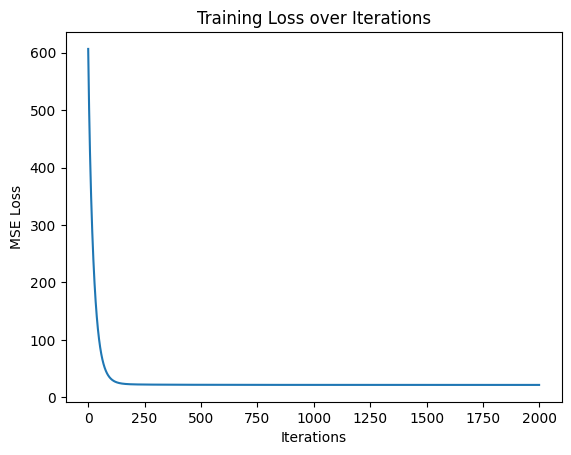

In [1]:
# Andy Nguyen (2025319249)
# SKKU 2025 Fall
# SWE3050-41

# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# download Boston Housing dataset from CMU repository
# python ver over 1.2 does not support built-in load_boston features
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# process dataset
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2].reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# train/test split & preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# add bias column (intercept)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# a1. gradient descent implementation
def compute_mse(X, y, weights):
    """compute mean squared error (MSE)"""
    predictions = X.dot(weights)
    errors = predictions - y
    return np.mean(errors ** 2)

def gradient_descent(X, y, lr=0.01, epochs=1000):
    """perform gradient descent"""
    n_samples, n_features = X.shape
    weights = np.zeros((n_features, 1))  # initialize weights
    losses = []

    for i in range(epochs):
        predictions = X.dot(weights)
        errors = predictions - y
        # gradient of mse loss
        gradient = (2/n_samples) * X.T.dot(errors)
        # update weights
        weights -= lr * gradient
        # record loss
        loss = np.mean(errors ** 2)
        losses.append(loss)

        if i % 100 == 0:
            print(f"Epoch {i}, MSE: {loss:.4f}")

    return weights, losses

# a2. train the model
weights, losses = gradient_descent(X_train, y_train, lr=0.01, epochs=2000)

# a3. plot training loss
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training Loss over Iterations")
plt.show()

## B. Evaluation (10 pts)
* Compute MSE on the test set.
* Plot predicted vs. actual house values for the test set.

Test MSE: 24.3832


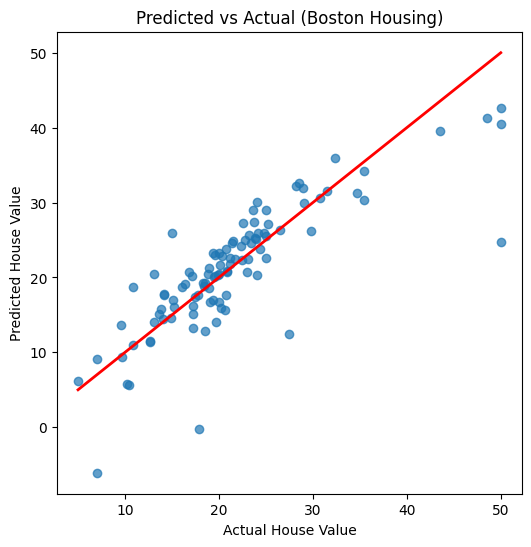

In [2]:
# b1: compute MSE on the test set
test_mse = compute_mse(X_test, y_test, weights)
print(f"Test MSE: {test_mse:.4f}")

# predict house values
y_pred = X_test.dot(weights)

# b2: plot predicted vs. actual values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2)  # perfect prediction line
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Predicted vs Actual (Boston Housing)")
plt.show()

## C. Visualization [10 pts]:
* Plot the regression line on the training data (scatter plot of RM vs MEDV).
* Plot the training loss curve vs. iteration.


Epoch 0, MSE: 606.5554
Epoch 100, MSE: 81.2605
Epoch 200, MSE: 72.0216
Epoch 300, MSE: 71.8591
Epoch 400, MSE: 71.8563
Epoch 500, MSE: 71.8562
Epoch 600, MSE: 71.8562
Epoch 700, MSE: 71.8562
Epoch 800, MSE: 71.8562
Epoch 900, MSE: 71.8562


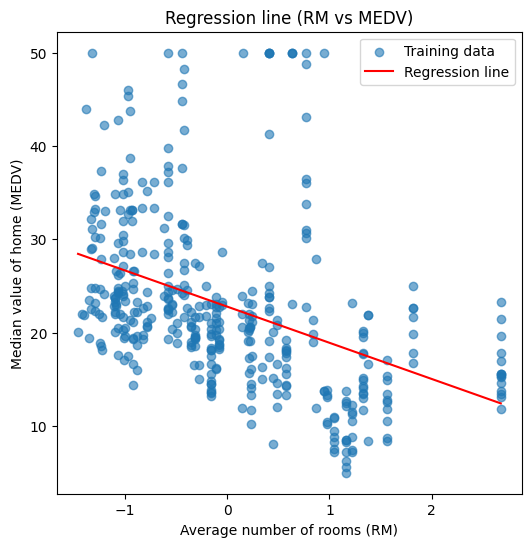

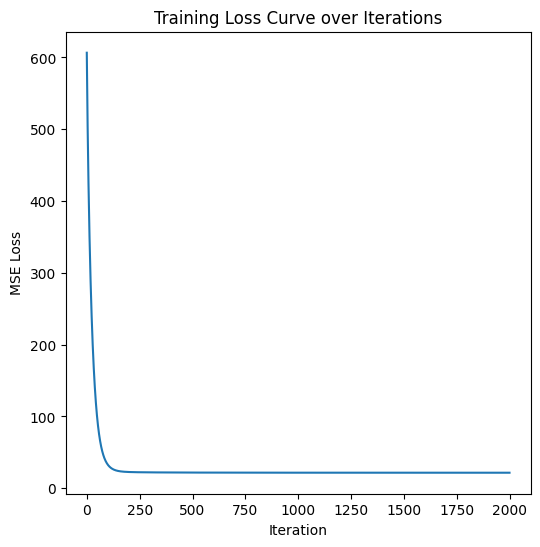

In [3]:
# c1. regression line (using RM)
rm_index = 5
X_rm = X_train[:, [0, rm_index]]  # take bias + RM column
y_rm = y_train

# retrain model with only RM feature
weights_rm, losses_rm = gradient_descent(X_rm, y_rm, lr=0.01, epochs=1000)

# plot scatter of RM vs MEDV
plt.figure(figsize=(6,6))
plt.scatter(X_rm[:,1], y_rm, alpha=0.6, label="Training data")  # column 1 = RM
# regression line
x_line = np.linspace(X_rm[:,1].min(), X_rm[:,1].max(), 100).reshape(-1,1)
x_line_bias = np.c_[np.ones(x_line.shape[0]), x_line]
y_line = x_line_bias.dot(weights_rm)
plt.plot(x_line, y_line, color="red", label="Regression line")
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Median value of home (MEDV)")
plt.title("Regression Line (RM vs MEDV)")
plt.legend()
plt.show()

# c2: training loss curve
plt.figure(figsize=(6,6))
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve over Iterations")
plt.show()